<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%202%20DL%20Inage%20Analysis%202/TransferLearningAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning

The exercises below take you through transfer learning, from the least transfer type learning to the most

In [ ]:
# load the cifar 10 dataset from keras
import tensorflow as tf
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# limit the data to 10000 instances otherwise it will crash colab when reshaping below
x_train = x_train[:10000]

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = tf.keras.applications.mobilenet_v2.preprocess_input(x_train)
y_train = tf.keras.utils.to_categorical(y_train)

print(x_train.shape)

# resize images to the image size upon which the network was pre-trained
# the original Imangnet image sizes were 224 x 224 but size 128 x 128 will also work with the current weights (see documentation)
# reshape to 128 x 128
# however this crashes colab with a memory error if there's too much data
x_train = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (128, 128)))(x_train)
print(x_train.shape)

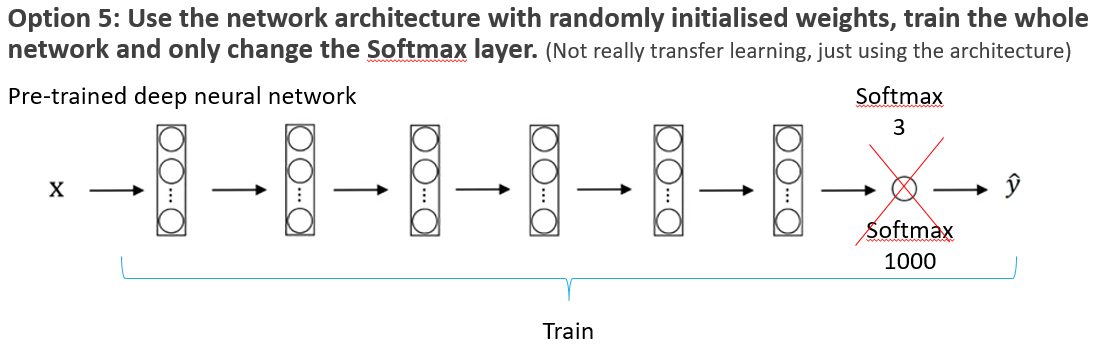

In [ ]:
# we just use the architecture of the already existing DNN and do not use any of the pre-trained weights
# strictly speaking this is not transfer learning, it's just using an existing architecture but can be a valid option

# this network was orginally designed for and trained on imagenet which has 1000 classfiications

model = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=True,  # include_top=True means that the classifier section (the flat layers at the end of the network) are included in the model
    weights=None,      # weights=None means that the weights will not be pre-initialized from training on another dataset. They will be randomly initialized
    classes=10,        # CIFAR 10 has 10 calssifications (this effectively chagnes our softmax layer from 1000 to 10)
    classifier_activation="softmax",
)

model.summary()

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

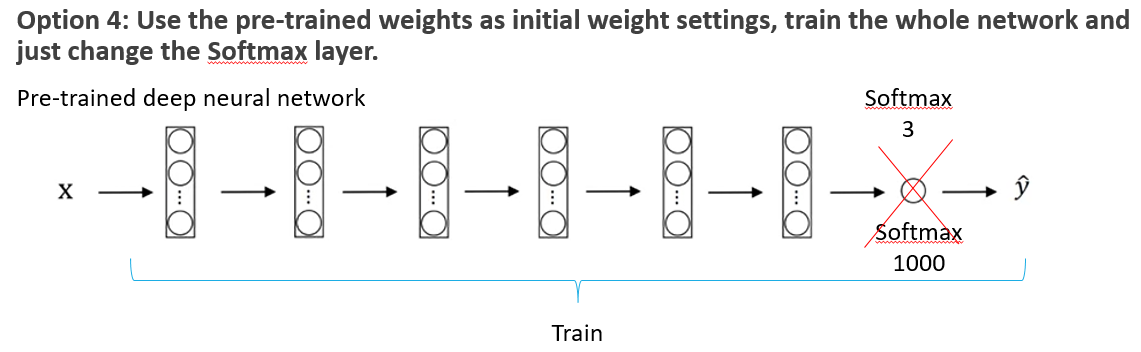

In [ ]:
# when using imagenet weights, if we want to change the number of classes in the softmax layer, include_top must be set to False
# this means the flat classification layers have also been removed as well as changing the softmax layer from 1000 to 10
# so this is more like option 4 below
model = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,      # include_top=True means that the classifier section (the flat layers at the end of the network) are included in the model
    weights='imagenet',     # weights='imagenet' means that the weights will not be pre-initialized from training on the imagenet dataset
    classes=10,             # CIFAR 10 has 10 calssifications (this effectively chagnes our softmax layer from 1000 to 10)
    classifier_activation="softmax",
)
model.summary()


In the summary for the above network, there is no flattened layers or softmax layer so the model will error if we try to fit it...

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

We need to add our own flat classfication layer and softmax layer

In [ ]:
# create our model without the classification part
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,      
    weights='imagenet',     
    classes=10,             
    classifier_activation="softmax",
)

from keras.layers import Flatten, Dense, Dropout
from keras import Sequential

# Create the transfer model
model = Sequential()    # create a blank transfer model
model.add(base_model)   # add base pretrained model to our transfer model
model.add(Flatten())    # add flatten layer so we can add the fully connected layer later
model.add(Dense(10, activation='softmax'))  # add the output layer
model.summary()

The base model architecture is not explicitly shown in the summary and we can see the extra flatten layer and softmax layer we have added.

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

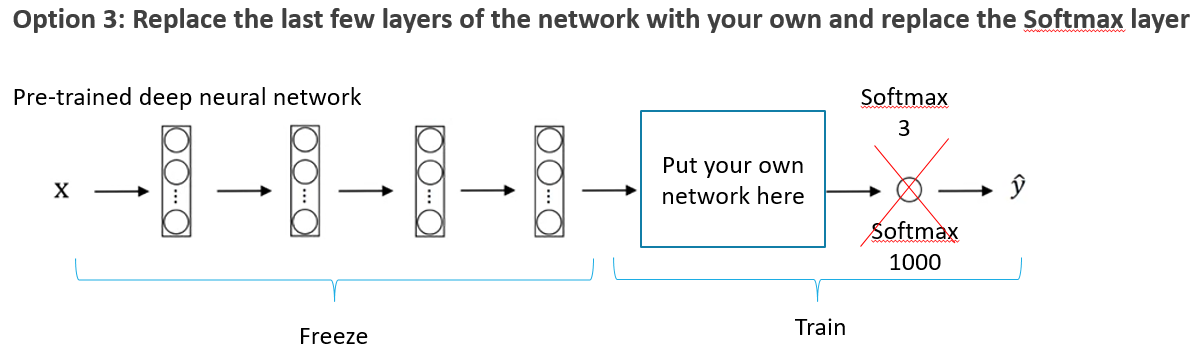

**This is the most common setup for transfer learning as in reality you will probably need to add to the network to get the best results**

In [ ]:
# create this network here
# hint: to freeze parameters there is a variable on the model called 'trainable' that can be set to False

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

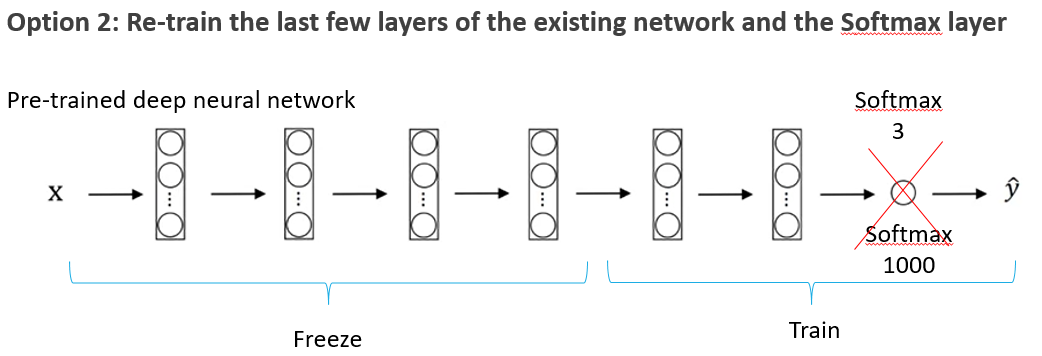

In [ ]:
# create this network here
# hint: each layer has it's own trainable parmeter that can be set:
base_model.layers[-1].trainable == True



In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

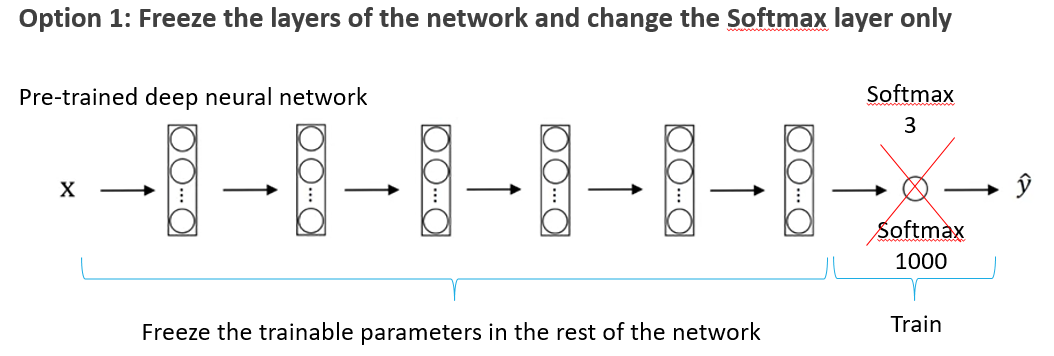

In [ ]:
# create this network here:

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=1,
    shuffle=True) 

# summarize the history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()